# 1. Data Import
#### Importing the data from csv files and using the library function ####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
from sklearn import metrics
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import IPython
import sweetviz as sv
%matplotlib inline
plt.style.use('ggplot')
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/garyhsu/Library/Mobile Documents/com~apple~CloudDocs/Documents/file/Macquarie 2020/S1/6200 Data Science/classification/train.csv', encoding='UTF-8')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0         7.0    0.6   
1           1021     1          0.5         1   0       1        53.0    0.7   
2            563     1          0.5         1   2       1        41.0    0.9   
3            615     1          2.5         0   0       0         NaN    0.8   
4           1821     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0      188.0        2  ...         20     756.0  2549.0   9.0   7.0   
1      136.0        3  ...        905    1988.0  2631.0  17.0   3.0   
2      145.0        5  ...       1263    1716.0  2603.0  11.0   2.0   
3      131.0        6  ...       1216    1786.0  2769.0  16.0   8.0   
4      141.0        2  ...       1208    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0       19.0        0             0     1            1  
1        7.0        1             1     0            2  
2        9.0        1             1     0            2  
3       11.0        1             0     0            2  
4       15.0        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
#analyzing the dataset
#advert_report = sv.analyze(df)
#display the report
#advert_report.show_html('Mobile.html')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    1957 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1974 non-null   float64
 7   m_dep          1984 non-null   float64
 8   mobile_wt      1972 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1969 non-null   float64
 13  ram            1978 non-null   float64
 14  sc_h           1982 non-null   float64
 15  sc_w           1982 non-null   float64
 16  talk_time      1986 non-null   float64
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 2. Data Preparation

2.1 Turn the response into category variable for predicting classification. 

In [4]:
df['price_range']=df['price_range'].astype(str)
df['price_range']=df['price_range'].str.replace('3',"3:very high cost")
df['price_range']=df['price_range'].str.replace('2',"2:high cost")
df['price_range']=df['price_range'].str.replace('1',"1:medium cost")
df['price_range']=df['price_range'].str.replace('0',"0:low cost")

2.2 Fill the null value in clock_speed, int_memory, m_dep, mobile_wt, px_width, ram, sc_h, sc_w, and talk_time with mean.

In [5]:
df['clock_speed'] = df['clock_speed'].fillna((round(df['clock_speed'].mean())))
df['int_memory'] = df['int_memory'].fillna((round(df['int_memory'].mean())))
df['m_dep'] = df['m_dep'].fillna((round(df['m_dep'].mean())))
df['mobile_wt'] = df['mobile_wt'].fillna((round(df['mobile_wt'].mean())))
df['px_width'] = df['px_width'].fillna((round(df['px_width'].mean())))
df['ram'] = df['ram'].fillna((round(df['ram'].mean())))
df['sc_h'] = df['sc_h'].fillna((round(df['sc_h'].mean())))
df['sc_w'] = df['sc_w'].fillna((round(df['sc_w'].mean())))
df['talk_time'] = df['talk_time'].fillna((round(df['talk_time'].mean())))

2.3 Check all data does not haave any null value.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 3.Data Exploring

Heat Map

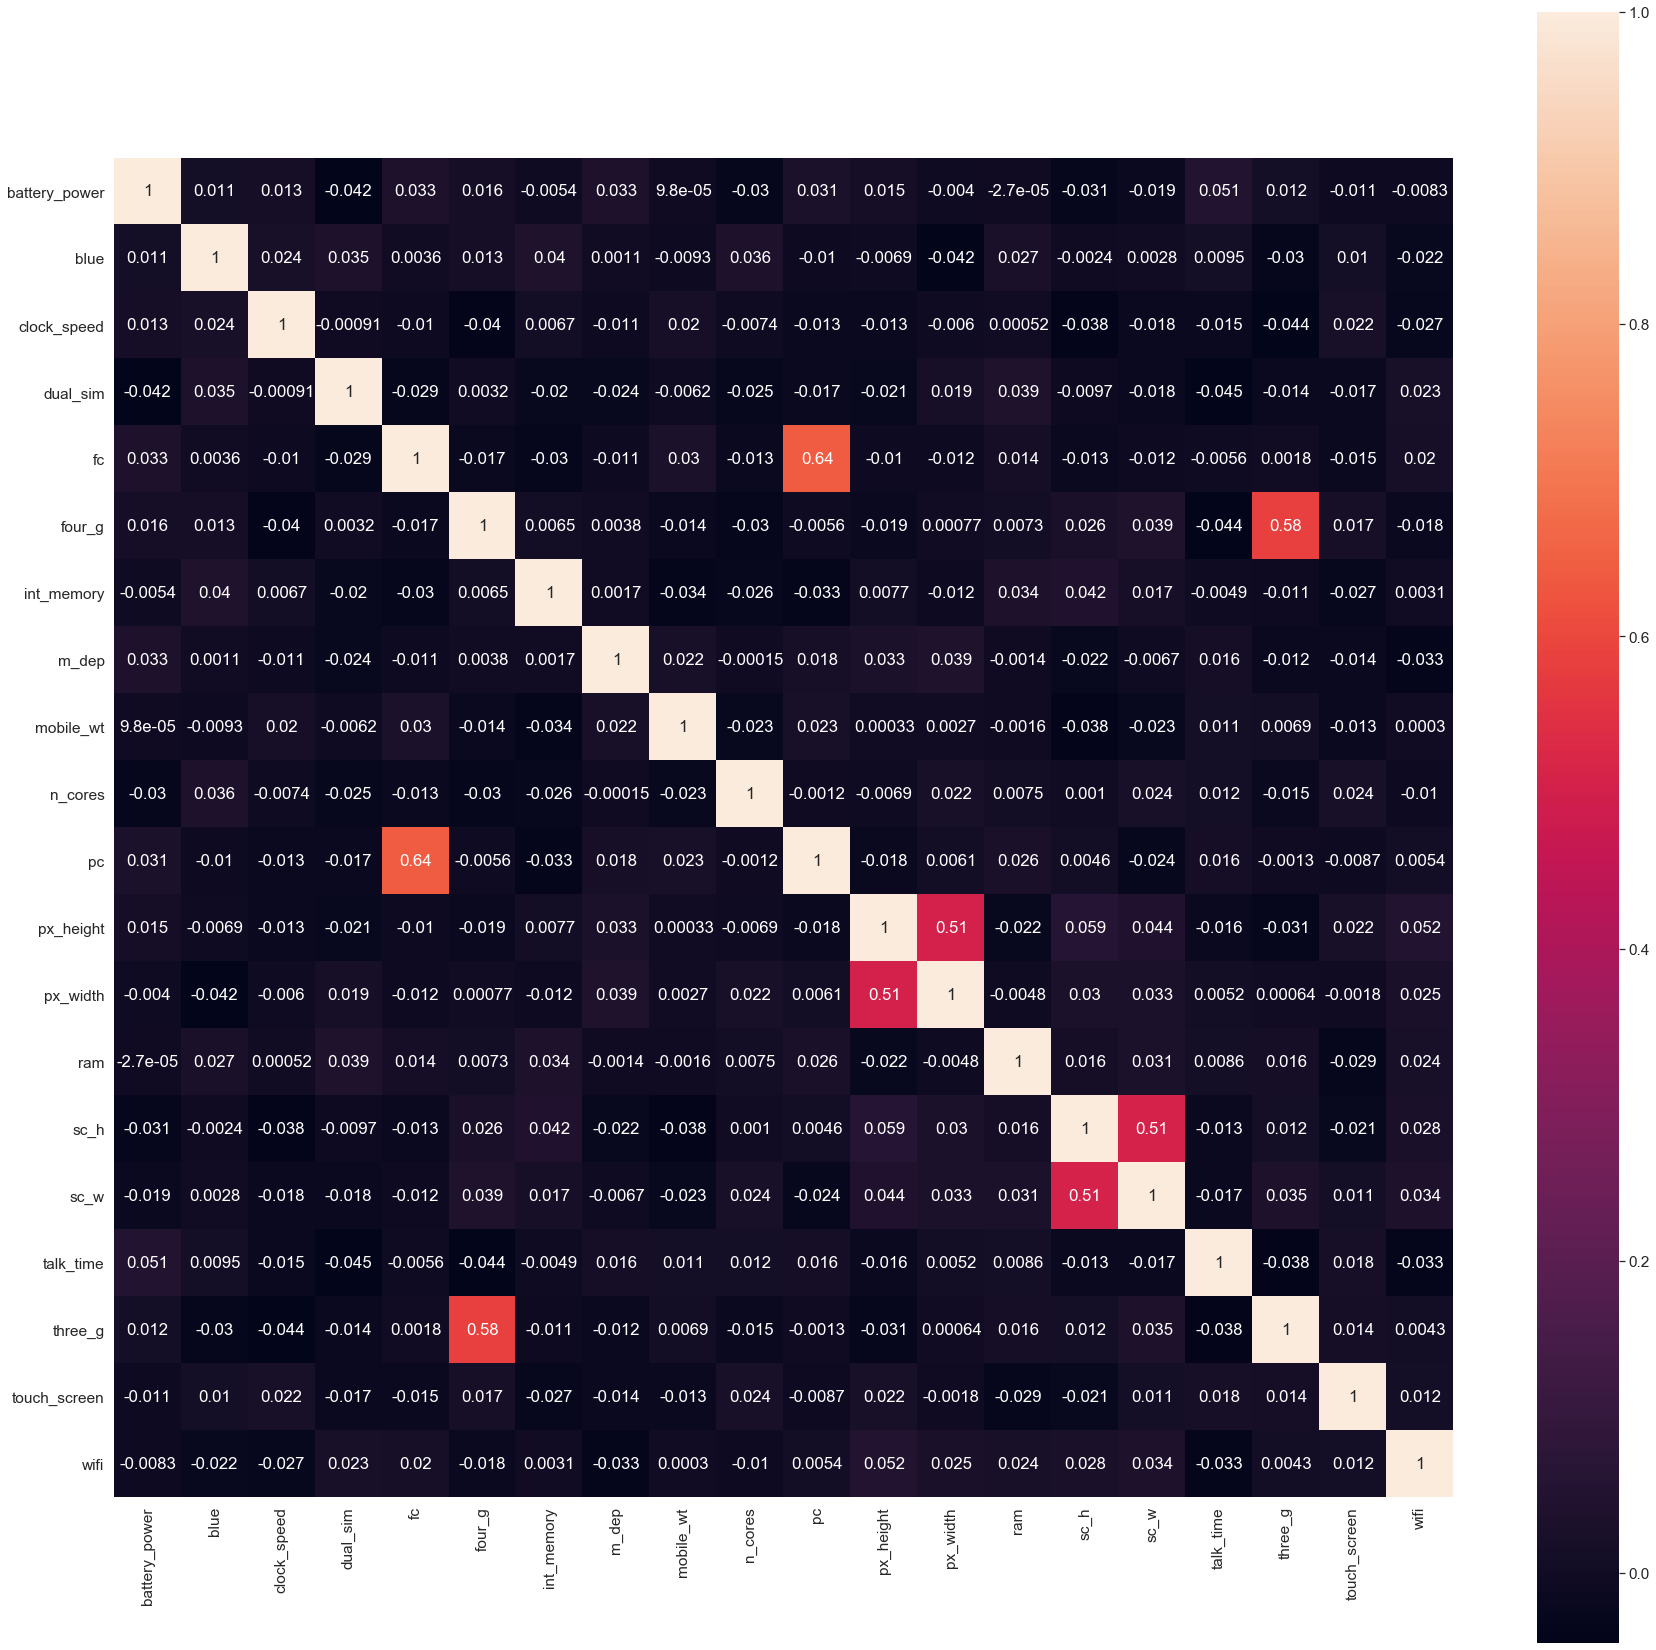

In [7]:
cor = df.corr()
plt.figure(figsize=(30,30))
sns.set(font_scale=1.4)
sns.heatmap(cor, square=True, annot=True)
plt.show()

#### 3.1 
The number of data in each district.

In [8]:
fig = px.scatter(df, x="ram", y="battery_power", color="price_range",
       category_orders={"price_range": ["0:low cost", "1:medium cost", "2:high cost", "3:very high cost"]}
                )
fig.show()

In [9]:
fig = px.box(df, x="price_range", y="int_memory",color="price_range",points="all",
            category_orders={"price_range": ["0:low cost", "1:medium cost", "2:high cost", "3:very high cost"]})

fig.show()

In [10]:
fig = px.density_contour(df, x="ram", y="price_range", color="price_range", 
                         marginal_x="rug", marginal_y="histogram",
                        category_orders={"price_range": ["0:low cost", "1:medium cost", "2:high cost", "3:very high cost"]})
fig.show()

In [11]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["fc"],name='front camera'))
fig.add_trace(go.Histogram(x=df["pc"],name='primary camera'))

# Overlay both histograms
fig.update_layout(barmode='overlay',
                  xaxis_title_text='Mega pixels', # xaxis label
                  yaxis_title_text='Count')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)


fig.show()

In [12]:
fig = px.histogram(df, x="ram", y="dual_sim", color="price_range", facet_col="dual_sim",
       category_orders={"price_range": ["0:low cost", "1:medium cost", "2:high cost", "3:very high cost"]})
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)


fig.show()

In [13]:
fig = px.histogram(df, x="ram", y="dual_sim", color="price_range",
       category_orders={"price_range": ["0:low cost", "1:medium cost", "2:high cost", "3:very high cost"]})

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)


fig.show()

In [14]:
fig = px.box(df, x="price_range", y="sc_h",color="price_range",points="all",
            category_orders={"price_range": ["0:low cost", "1:medium cost", "2:high cost", "3:very high cost"]})

fig.show()

In [15]:
df2=df.groupby(["n_cores", "price_range"]).size().reset_index(name="Value")
df2 = df2.sort_values('Value', ascending=False)
df2.head()

n_cores       price_range  Value
1         1     1:medium cost     76
13        4     1:medium cost     76
14        4       2:high cost     73
30        8       2:high cost     70
19        5  3:very high cost     70

In [16]:
df2 = pd.pivot_table(df2, values='Value', index=['n_cores'],columns=['price_range'])
df2

price_range  0:low cost  1:medium cost  2:high cost  3:very high cost
n_cores                                                              
1                    49             76           52                65
2                    69             59           57                62
3                    62             69           56                59
4                    67             76           73                58
5                    59             51           66                70
6                    61             54           57                58
7                    66             55           69                69
8                    67             60           70                59

In [17]:
df2 = df2.apply(lambda x: x*100/sum(x), axis=1)
df2

price_range  0:low cost  1:medium cost  2:high cost  3:very high cost
n_cores                                                              
1             20.247934      31.404959    21.487603         26.859504
2             27.935223      23.886640    23.076923         25.101215
3             25.203252      28.048780    22.764228         23.983740
4             24.452555      27.737226    26.642336         21.167883
5             23.983740      20.731707    26.829268         28.455285
6             26.521739      23.478261    24.782609         25.217391
7             25.482625      21.235521    26.640927         26.640927
8             26.171875      23.437500    27.343750         23.046875

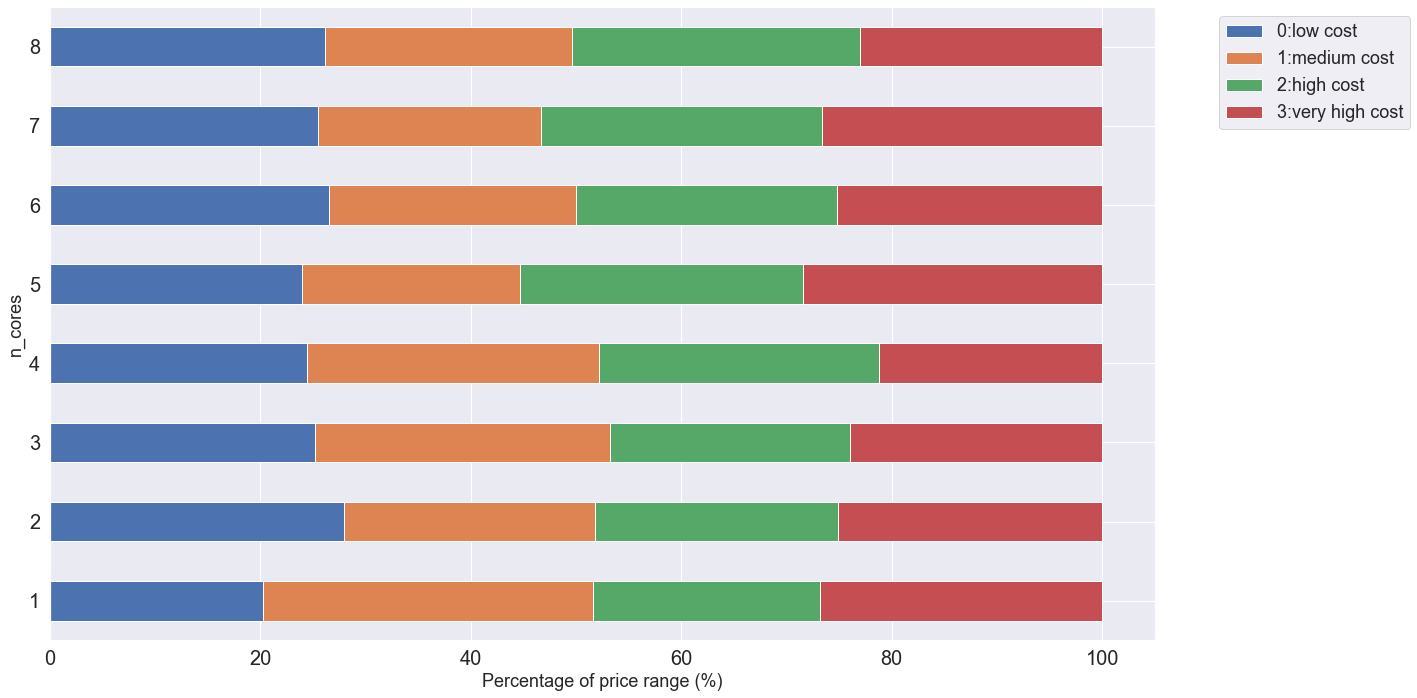

In [18]:
df2.plot(kind="barh", stacked=True,figsize=(20, 10),fontsize=20)
plt.xlabel("Percentage of price range (%)", fontsize=18)
plt.ylabel("n_cores", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=18)
plt.tight_layout()

# Split the data ( training:80%, testing=20% )

In [19]:
y= df["price_range"]
X=df.drop(["price_range"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size = 0.2)
print(X_train.head())

     battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
968           1923     0          0.5         1   7       0        46.0   
240            633     1          2.2         0   0       1        49.0   
819           1236     0          0.9         1   2       1        57.0   
692            781     0          1.1         0   2       0        38.0   
420           1456     1          0.5         1   7       0         7.0   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width     ram  sc_h  sc_w  \
968    0.5      191.0        1  10        767    1759.0  1489.0  10.0   9.0   
240    0.1      139.0        8   1        529    1009.0  3560.0  11.0   1.0   
819    0.1      188.0        1  14        517     809.0  1406.0  14.0  12.0   
692    0.4      198.0        5   7        304    1674.0  3508.0  13.0   8.0   
420    0.4      105.0        5  12        823    1104.0  1587.0   6.0   5.0   

     talk_time  three_g  touch_screen  wifi  
968        3.0        1     

In [20]:
#analyzing the dataset
#compare_report = sv.compare([X_train,'Train'],[X_test,'test'])
#display the report
#compare_report.show_html('Mobile_split_data.html')

In [21]:
#checking again for Null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Standardization

In [22]:
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

# Constructed a decision tree plot

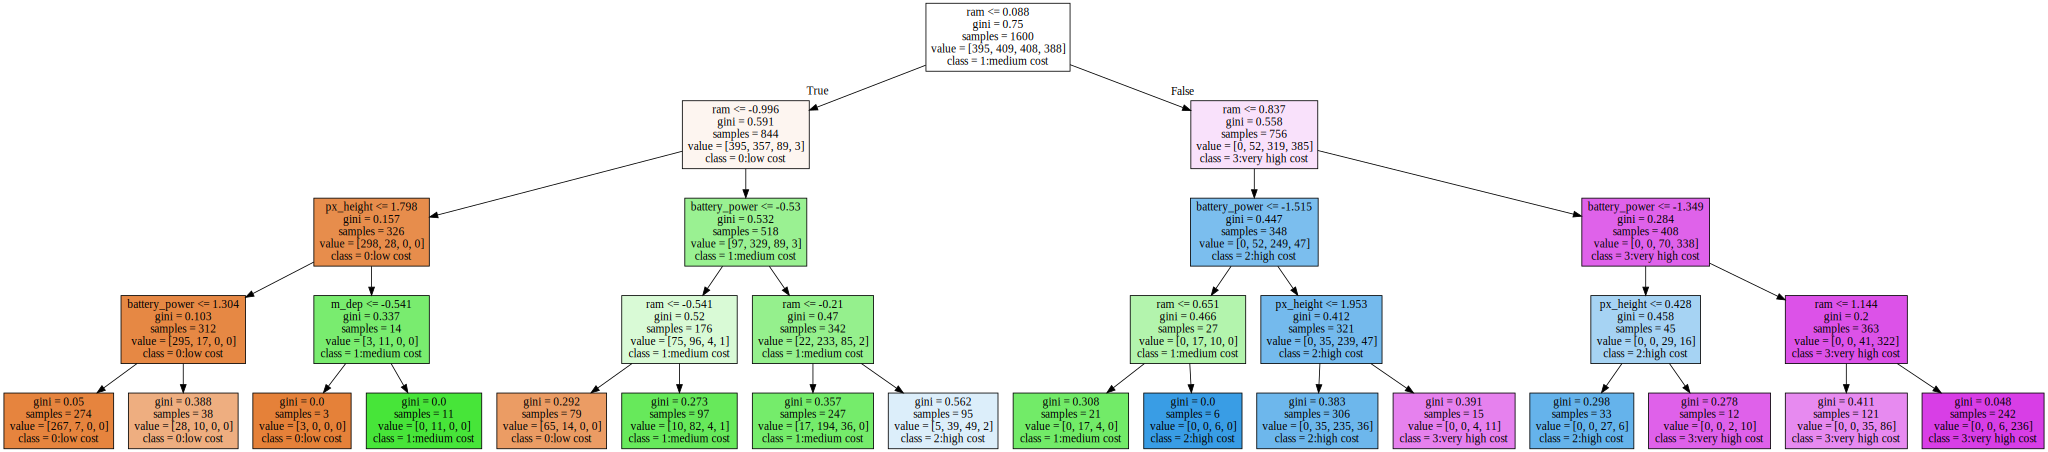

In [23]:
from sklearn import tree

clf=DecisionTreeClassifier(random_state=42,max_depth=4)

clf.fit(X_train_normalized, y_train)


import graphviz

# DOT data
dot_data = tree.export_graphviz(clf,filled=True,out_file=None,
                                feature_names = list(X),
                                class_names=["0:low cost", "1:medium cost", "2:high cost", "3:very high cost"])

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [24]:
#Save the decision tree plot
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

# Create confusion matrix in plot.

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Classification Model
(1)  DecisionTreeClassifier (Decision Tree)

(2)  SVC (Support Vector Machines)

(3)  KNeighborsClassifier (Nearest Neighbors)

(4)  LogisticRegression

(5)  RandomForestClassifier (Ensemble Learning)

(6)  XGBClassifier (Ensemble Learning)

--------------------------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
--------------------------------------------------------------------------------
training dataset
train accuracy: 0.829375
--------------------------------------------------------------------------------
testing dataset
test accuracy: 0.7875
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      0:low cost       0.94      0.89      0.91       105
   1:medium cost       0.73      0.73      0.73        91

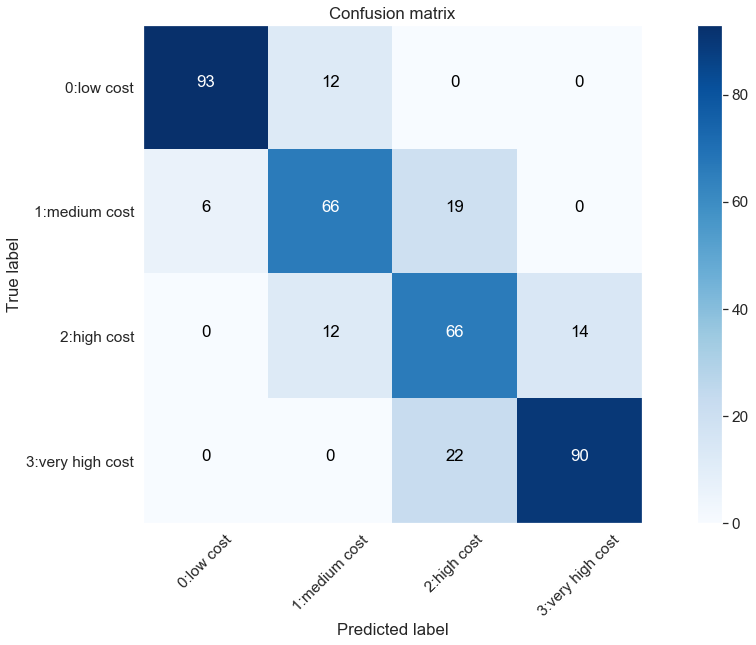


--------------------------------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------------
training dataset
train accuracy: 0.976875
--------------------------------------------------------------------------------
testing dataset
test accuracy: 0.875
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      0:low cost       0.94      0.93      0.94       105
   1:medium cost       0.80      0.87      0.83        91
     2:high cost       0.80      0.82      0.81        92
3:very high cost       0.95      0.88      0.91       112

        accuracy                           0.88       40

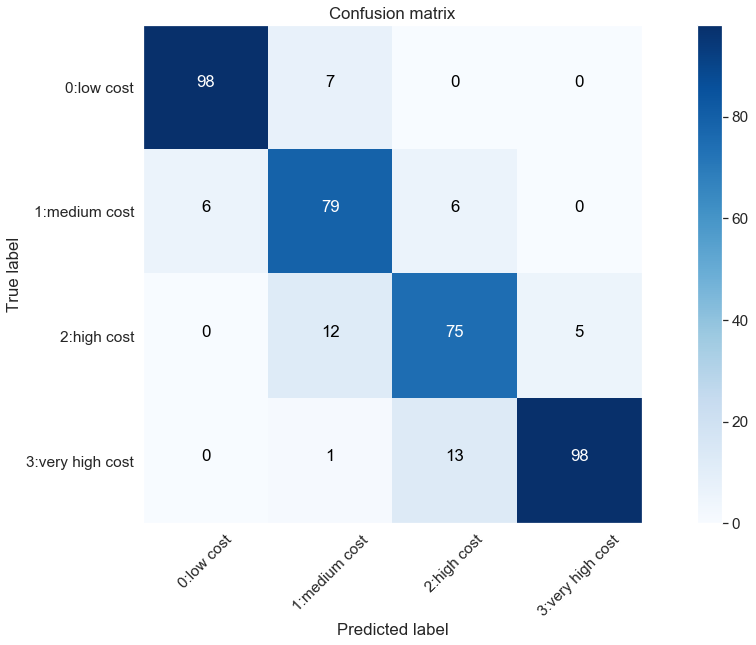


--------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
--------------------------------------------------------------------------------
training dataset
train accuracy: 0.70875
--------------------------------------------------------------------------------
testing dataset
test accuracy: 0.46
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      0:low cost       0.53      0.71      0.61       105
   1:medium cost       0.26      0.35      0.30        91
     2:high cost       0.36      0.29      0.32        92
3:very high cost       0.81      0.45      0.57       112

        accuracy                           0.46       400
       macro avg       0.49      0.45      0.45       400
   

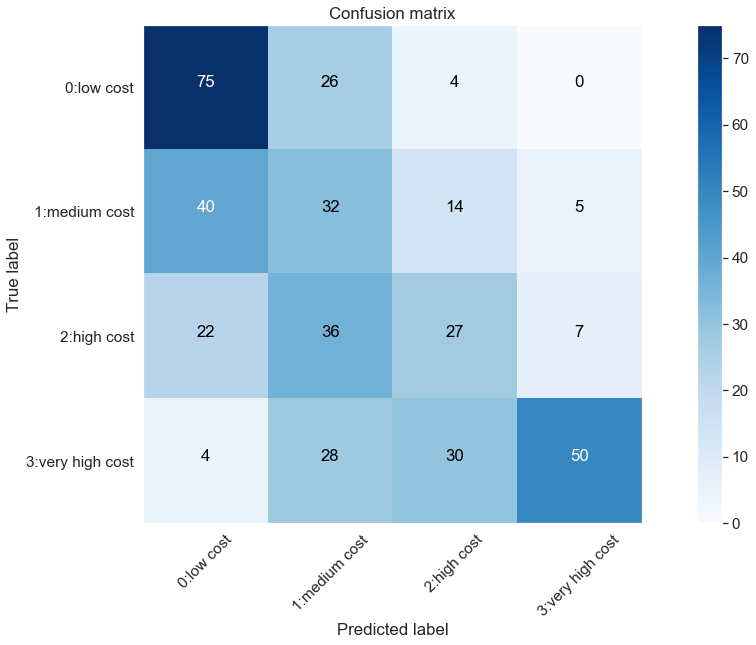


--------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------------------------------------------
training dataset
train accuracy: 0.959375
--------------------------------------------------------------------------------
testing dataset
test accuracy: 0.9625
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      0:low cost       0.98      0.99      0.99       105
   1:medium cost       0.95      0.97      0.96        91
     2:high cost       0.95      0.93      0.94        92
3:very high cost       0.97      0.96 

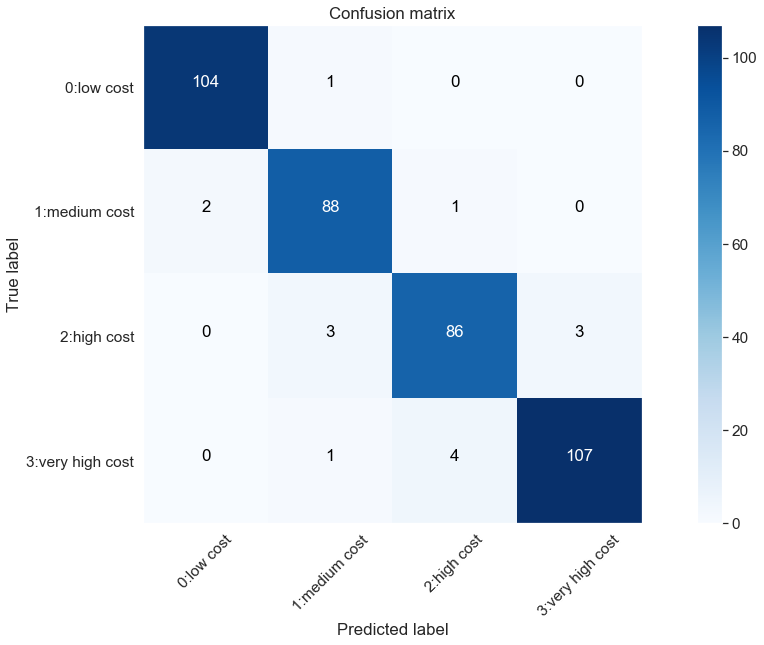


--------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
--------------------------------------------------------------------------------
training dataset
train accuracy: 1.0
--------------------------------------------------------------------------------
testing dataset
test accuracy: 0.87
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

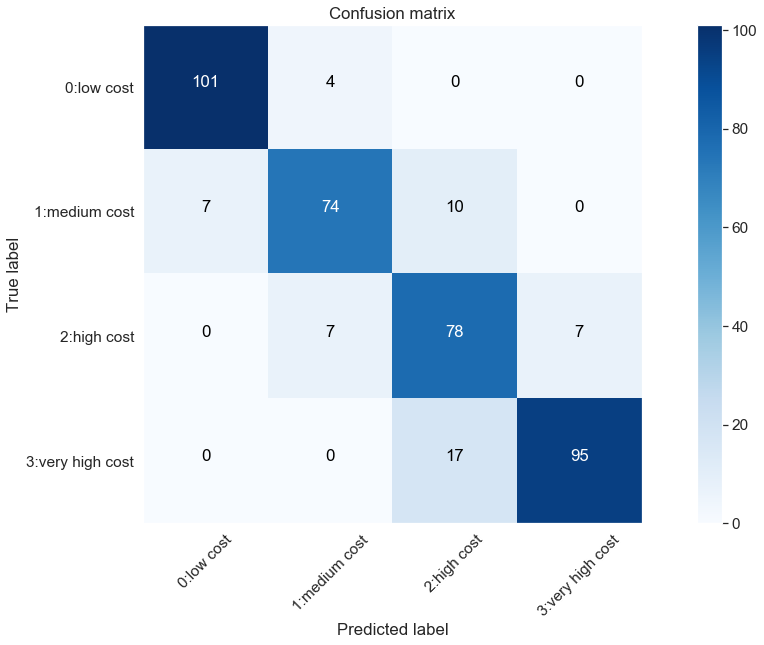


--------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
--------------------------------------------------------------------------------
training dataset
train accuracy: 0.97875
--------------------------------------------------------------------------------
testing dataset
test accuracy: 0.8725
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

      0:low cost       0.94      0.94      0.94       105
   1:mediu

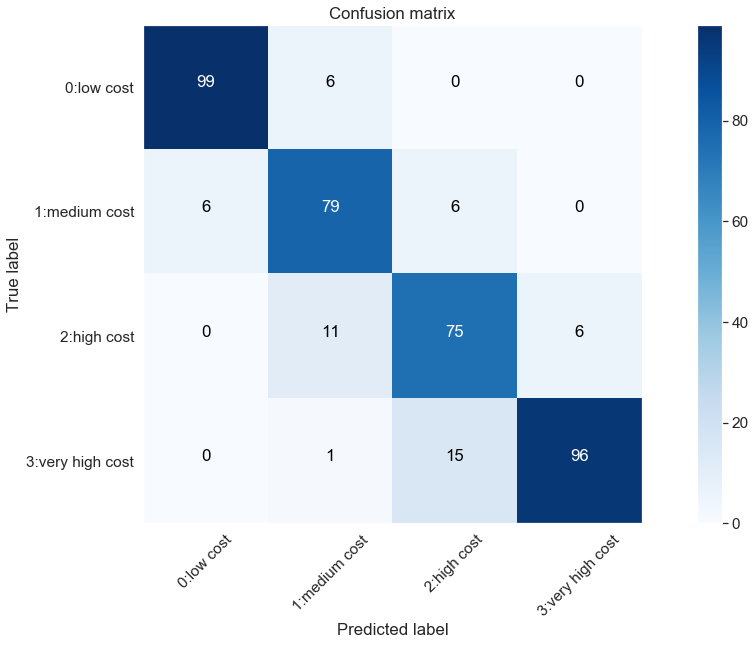

In [26]:
for clf in [DecisionTreeClassifier(random_state=42,max_depth=4),
          SVC(random_state=42),
          KNeighborsClassifier(n_neighbors=3),
          LogisticRegression(random_state=42),
          RandomForestClassifier(random_state=42),
          XGBClassifier()]:
    clf=clf
    
    clf.fit(X_train_normalized, y_train)
    print("--------------------------------------------------------------------------------")
    print(clf, end='\n')
    print("--------------------------------------------------------------------------------")
    print("training dataset")
    print("train accuracy:",clf.score(X_train_normalized,y_train))
    print("--------------------------------------------------------------------------------")
    print("testing dataset")

    y_test_pred = clf.predict(X_test_normalized)
    print("test accuracy:",metrics.accuracy_score(y_test,y_test_pred))
    print("--------------------------------------------------------------------------------")
    print(classification_report(y_test,y_test_pred))
    # Evaluate the model
    plt.figure(figsize=(16, 9))
    cnf_matrix = metrics.confusion_matrix(y_test,y_test_pred)
    target_names = ['0:low cost', '1:medium cost', '2:high cost', '3:very high cost']
    plt.grid(False)
    plot_confusion_matrix(cnf_matrix, classes=target_names)
    plt.show()
    print(end='\n')

# Cross Validation

In [27]:
from sklearn.model_selection import KFold             

kf = KFold(n_splits=5,random_state=42,shuffle=True)
kf.get_n_splits(X_train)                              

train_acc_list = []                                   
valid_acc_list = []                                   

for clf in [DecisionTreeClassifier(random_state=42,max_depth=4),
            SVC(random_state=42),
            KNeighborsClassifier(n_neighbors=3),
            LogisticRegression(random_state=42),
            RandomForestClassifier(random_state=42),
            XGBClassifier()]:
    for train_index, valid_index in kf.split(X_train):    
        train_x_split = X_train.iloc[train_index]         
        train_y_split = y_train.iloc[train_index]         
        valid_x_split = X_train.iloc[valid_index]        
        valid_y_split = y_train.iloc[valid_index]         
    

        clf=clf
        clf.fit(train_x_split, train_y_split)           
        train_pred_y = clf.predict(train_x_split)       
        train_acc = accuracy_score(train_y_split,train_pred_y)
        valid_pred_y = clf.predict(valid_x_split)      
        valid_acc = accuracy_score(valid_y_split,valid_pred_y)
    
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)
    print("--------------------------------------------------------------------------------")
    print(clf)
    print((
        'average train accuracy: {}\n' +
        'min train accuracy: {}\n' +
        'max train accuracy: {}').format(round(np.mean(train_acc_list),4),
                                         round(np.min(train_acc_list),4),
                                         round(np.max(train_acc_list),4)))
    print("--------------------------------------------------------------------------------")
    print((
        'average valid accuracy: {}\n' +
        'min valid accuracy: {}\n' +
        'max valid accuracy: {}').format(round(np.mean(valid_acc_list),4),
                                         round(np.min(valid_acc_list),4),
                                         round(np.max(valid_acc_list),4)))


    print(end='\n')

--------------------------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
average train accuracy: 0.8291
min train accuracy: 0.8078
max train accuracy: 0.8398
--------------------------------------------------------------------------------
average valid accuracy: 0.7863
min valid accuracy: 0.7469
max valid accuracy: 0.8094

--------------------------------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1